<a href="https://colab.research.google.com/github/tarupathak30/machine_learning_algorithms/blob/main/RidgeAndLassoRegression/RidgeRegularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ridge Regression using method Ordinary Least Square of Scikit Learn Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from sklearn.datasets import load_diabetes

data = load_diabetes()


In [3]:
x = data.data
y = data.target

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()

In [6]:
linear_regression.fit(x_train, y_train)

LinearRegression()

In [7]:
y_pred = linear_regression.predict(x_test)

In [8]:
from sklearn.metrics import r2_score, mean_squared_error

print("R2 Score : ", r2_score(y_test, y_pred))
print("Root Mean Squred Error : ", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score :  0.4526027629719195
Root Mean Squred Error :  53.85344583676593


In [9]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.0001)

In [10]:
ridge.fit(x_train, y_train)
y_pred = ridge.predict(x_test)


print("R2 Score : ", r2_score(y_test, y_pred))
print("Root Mean Squared Error : ", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score :  0.4526998154220112
Root Mean Squared Error :  53.84867157029345


In [11]:
# Ridge Regression from scratch

In [12]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

In [13]:
x, y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20, random_state=42)

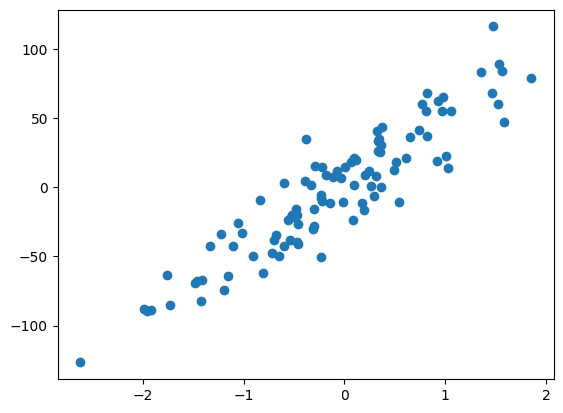

In [14]:
plt.scatter(x, y)

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lr = LinearRegression()
lr.fit(x, y)
print(lr.coef_)
print(lr.intercept_)

[47.13323967]
2.3302306410539453


In [17]:
from sklearn.linear_model import Ridge


In [18]:
rr = Ridge(alpha=0.1)
rr.fit(x, y)
print(rr.coef_)
print(rr.intercept_)

[47.0755859]
2.324243497432695


In [19]:
rr1 = Ridge(alpha=100)
rr1.fit(x, y)
print(rr1.coef_)
print(rr1.intercept_)

[21.18627364]
-0.3642714175995887


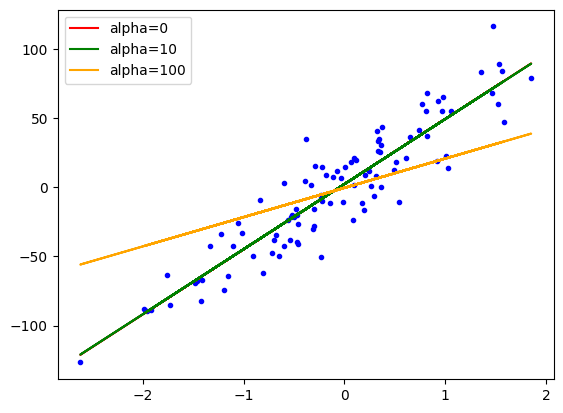

In [20]:
plt.plot(x, y, 'b.')
plt.plot(x, lr.predict(x), color='red', label="alpha=0")
plt.plot(x, rr.predict(x), color='green', label="alpha=10")
plt.plot(x, rr1.predict(x), color='orange', label="alpha=100")
plt.legend()
plt.show()

Creating from scratch the class to perform Ridge Regression(Ordinary Least Square)

In [21]:
class MeraRidge:
  def __init__(self, alpha=0.1):
    self.alpha = alpha
    self.m = None
    self.b = None

  def fit(self, x_train, y_train):
    num = 0
    deno = self.alpha

    for i in range(x_train.shape[0]):
      num = num + ((x_train[i] - x_train.mean()) * (y_train[i] - y_train.mean()))
      deno = deno + ((x_train[i] - x_train.mean()) ** 2)

    self.m = num/deno
    self.b = y_train.mean() - self.m * x_train.mean()
  def predict(self, x_test):
    pass

In [22]:
reg_ridge = MeraRidge()
reg_ridge.fit(x, y)

In [23]:
reg_ridge.m

array([47.0755859])

In [24]:
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score
import numpy as np

In [25]:
x, y = load_diabetes(return_X_y=True)

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [28]:
from sklearn.linear_model import Ridge

In [29]:
reg = Ridge(alpha=0.1, solver='cholesky')

In [30]:
reg.fit(x_train, y_train)

Ridge(alpha=0.1, solver='cholesky')

In [31]:
y_pred = reg.predict(x_test)
r2_score(y_test, y_pred)

0.46085219464119265

In [32]:
print(reg.coef_)
print(reg.intercept_)

[  42.85566976 -205.49431899  505.08903304  317.0932049  -108.50026183
  -86.23673333 -190.36318008  151.70708637  392.28931896   79.9081772 ]
151.45857456679613


In [33]:
class MeraNDimensionalRidge:

  def __init__(self, alpha=0.1):
    self.alpha = alpha
    self.coef_ = None
    self.intercept_ = None


  def fit(self, x_train, y_train):
    x_train = np.insert(x_train, 0, 1, axis=1)
    I = np.identity(x_train.shape[1]) #creating the identity matrix having column length equal to x_train
    I[0][0] = 0
    result = np.linalg.inv(np.dot(x_train.T, x_train) + self.alpha * I).dot(x_train.T).dot(y_train)

    self.intercept_ = result[0]
    self.coef_ = result[1:]

  def predict(self, x_test):
    return np.dot(x_test, self.coef_) + self.intercept_

In [34]:
from sklearn.metrics import mean_absolute_error

In [35]:
nDimRidgeRegression = MeraNDimensionalRidge()
nDimRidgeRegression.fit(x_train, y_train)
y_pred = nDimRidgeRegression.predict(x_test)

print("Mean Absolute Error : ", mean_absolute_error(y_test, y_pred))
print("R2 Score : ", r2_score(y_test, y_pred))
print(nDimRidgeRegression.intercept_)
print(nDimRidgeRegression.coef_)

Mean Absolute Error :  42.99693214159653
R2 Score :  0.4608521946411924
151.45857456679605
[  42.85566976 -205.49431899  505.08903304  317.0932049  -108.50026183
  -86.23673333 -190.36318008  151.70708637  392.28931896   79.9081772 ]


Ridge Regression using SGDRegressor Class of Scikit Learn

In [36]:
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score
import numpy as np

In [37]:
x, y = load_diabetes(return_X_y=True)

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [40]:
from sklearn.linear_model import SGDRegressor


In [41]:
reg = SGDRegressor(penalty='l2', max_iter=500, eta0=0.1, learning_rate='constant', alpha=0.001)

In [42]:
reg.fit(x_train, y_train)

y_pred = reg.predict(x_test)

print("R2 Score : ", r2_score(y_test, y_pred))
print(reg.coef_)
print(reg.intercept_)

R2 Score :  0.42873476012739353
[  47.11411214 -128.31511273  393.29560997  256.73270503  -29.15167673
  -66.49486651 -184.96510018  134.66114269  296.91633284  122.22099647]
[142.06038771]


In [44]:
from sklearn.linear_model import Ridge
reg = Ridge(alpha=0.001, max_iter=500, solver='sparse_cg')

In [46]:
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)

print("R2 Score : ", r2_score(y_test, y_pred))
print(reg.coef_)
print(reg.intercept_)

R2 Score :  0.45342802980618724
[  38.48350697 -241.35179372  543.83518162  346.78283303 -827.70199148
  437.17375182  116.9497504   260.75926817  696.12922689   49.74344986]
151.34198054847556


Ridge Regression using Gradient Descent Code From Scratch

In [59]:
class MeraRidgeGD:
  def __init__(self, epochs, learning_rate, alpha):
    self.learning_rate = learning_rate
    self.alpha = alpha
    self.epochs = epochs
    self.alpha = alpha
    self.coef_ = None
    self.intercept_ = None

  def fit(self, x_train, y_train):
    self.coef_ = np.ones(x_train.shape[1])
    self.intercept_ = 0
    theta = np.insert(self.coef_, 0, self.intercept_)

    x_train = np.insert(x_train, 0, 1, axis=1)

    for i in range(self.epochs):
      theta_derived = np.dot(x_train.T, x_train).dot(theta) - np.dot(x_train.T, y_train) + self.alpha * theta
      theta = theta - self.learning_rate * theta_derived

    self.coef_ = theta[1:]
    self.intercept_ = theta[0]

  def predict(self, x_test):
    return np.dot(x_test, self.coef_) + self.intercept_

In [60]:
ridgeGD = MeraRidgeGD(epochs=500, learning_rate=0.005, alpha=0.01)

ridgeGD.fit(x_train, y_train)
y_pred = ridgeGD.predict(x_test)

print("R2 Score : ", r2_score(y_test, y_pred))
print(ridgeGD.coef_)
print(ridgeGD.intercept_)

R2 Score :  0.45940389853847896
[  43.49153784 -190.11478495  493.33449546  317.62754813  -63.30683004
 -111.78807342 -212.96625403  144.60934799  365.64771309  119.72554111]
151.41255171930152
